In [27]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
import os
import pandas as pd
import numpy as np

In [29]:
RESULT_FOLDER = "./all_results"

In [30]:
batch_lst = os.listdir(RESULT_FOLDER)

In [31]:
model_rst_df_dct = {}
for bt in batch_lst:
    this_model_lst = os.listdir(os.path.join(RESULT_FOLDER, bt))
    for model in this_model_lst:
        if "." not in model and model != "pics":
            try:
                model_rst_df_dct[(int(bt), int(model))] = pd.read_csv(
                    os.path.join(RESULT_FOLDER, bt, model, "results.csv"), dtype={"date": int}, index_col=0)
            except FileNotFoundError:
                model_rst_df_dct[(int(bt), int(model))] = np.nan
                

In [32]:
def IC_test(account_key):
    try:
        return (*account_key, model_rst_df_dct[account_key].groupby("date").mean().corr().iat[0, 1])
    except AttributeError:
        return (*account_key, np.nan)

In [7]:
IC_lst = list(map(IC_test, model_rst_df_dct))
IC_lst.sort(key=lambda x: x[2], reverse=True)
IC_lst[:20]

[(1, 12, 0.0038313691876006),
 (1, 19, 0.003648668860019481),
 (1, 21, 0.003041373491812527),
 (1, 22, 0.0028982920364443825),
 (235, 28, 0.0027519902589854804),
 (235, 23, 0.002594959067554632),
 (235, 41, 0.0022305781892320822),
 (235, 39, 0.002177762106595486),
 (1, 18, 0.0020751420973294),
 (235, 13, 0.0020258370344478287),
 (1, 6, 0.0019574347953768955),
 (235, 17, 0.0017473616603381238),
 (235, 26, 0.0016191943911957564),
 (235, 43, 0.00147648089115179),
 (235, 37, 0.001476435626104086),
 (235, 2, 0.00147643562606553),
 (235, 18, 0.0014764356260655231),
 (235, 30, 0.001001238154830838),
 (235, 31, 0.0009201358499537597),
 (235, 15, 0.0007168912225670848)]

In [25]:
def mse_test(account_key):
    try:
        tdf_lst = model_rst_df_dct[account_key].groupby("date")
        
        rst_df_lst = []
        for date, df in tdf_lst:
            rst_df_lst.append(df.iloc[:, 1:] / df.iloc[0, 1:])
        
        tdf = pd.concat(rst_df_lst)
        
        return (*account_key, np.linalg.norm(tdf["y_predict"].values - tdf["y_test"].values))
    except AttributeError:
        return (*account_key, np.nan)

In [26]:
mse_lst = list(map(mse_test, model_rst_df_dct))
mse_lst.sort(key=lambda x: x[2], reverse=False)
mse_lst[:20]

KeyboardInterrupt: 

In [63]:
account_key = (1, 8)
tdf_lst = model_rst_df_dct[account_key].groupby("date")

rst_df_lst = []
for date, df in tdf_lst:
    cdf = df.copy()
    cdf.loc[:, ["y_predict", "y_test"]] /= cdf.loc[0, ["y_predict", "y_test"]]
    rst_df_lst.append(cdf)

tdf = pd.concat(rst_df_lst)
best_df = tdf.groupby("date").mean()
best_df.to_excel("1_8.xlsx")

In [68]:
# 去除例外值画图
# 考察胜率
# 考察生么时候胜，什么时候负（时间？，引入新债？）

In [66]:
best_df2 = model_rst_df_dct[account_key].sort_values(["ticker", "date"])

In [67]:
best_df2.to_excel("1_8_3.xlsx")

In [47]:
tdf2 = tdf[tdf["y_predict"] != 1]

In [50]:
tdf2.to_excel("1_8_2.xlsx")

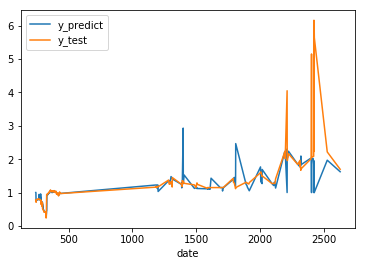

In [59]:
tdf2.loc[:, ["y_predict", "y_test", "date"]].groupby("date").last().plot()

In [60]:
tdf2.corr()

,date,score
date,1.000000,0.160742
score,0.160742,1.000000


In [34]:
best_df.to_excel("235_9.xlsx")

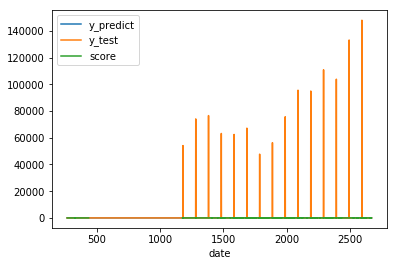

In [35]:
best_df.plot()

In [43]:
result_folder_lst = os.listdir(RESULT_FOLDER)

In [44]:
result_folder_lst.remove(".gitignore")
result_folder_lst.remove("pics")

In [45]:
df_lst = [pd.read_csv(os.path.join(RESULT_FOLDER, name, "results.csv"), index_col=0) for name in result_folder_lst]

In [46]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

In [47]:
# 计算每个模型：平均拟合指标，画每日拟合图
def calc_mean_measure(df, metric_obj):
    tdf = df.groupby("date").mean()
    try:
        return metric_obj(tdf["y_test"], tdf["y_predict"])
    except:
        return np.nan

In [48]:
score_lst = [(ch, calc_mean_measure(df_lst[idx], r2_score)) for idx, ch in enumerate(result_folder_lst)]
score_lst.sort(key=lambda x: x[1], reverse=True)
score_lst[:20]

C:\Users\hoore\Miniconda3\envs\work\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\hoore\Miniconda3\envs\work\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\hoore\Miniconda3\envs\work\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


[('100', nan),
 ('12', nan),
 ('2', 0.9821789911468934),
 ('15', 0.9821710555775529),
 ('103', 0.9819749127763923),
 ('25', nan),
 ('27', nan),
 ('29', nan),
 ('3', 0.9822393674701966),
 ('31', nan),
 ('37', 0.982028662113291),
 ('24', 0.9819164341956165),
 ('21', 0.981656367189786),
 ('108', 0.9816496307845006),
 ('41', 0.9816267940351537),
 ('105', 0.9815977381298774),
 ('107', 0.9815591876053984),
 ('18', 0.9814662190861494),
 ('39', 0.9814370143552956),
 ('17', 0.9813961186443723)]

In [49]:
score_lst = [(ch, calc_mean_measure(df_lst[idx], explained_variance_score)) for idx, ch in enumerate(result_folder_lst)]
score_lst.sort(key=lambda x: x[1], reverse=True)
score_lst[:20]

C:\Users\hoore\Miniconda3\envs\work\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\hoore\Miniconda3\envs\work\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\hoore\Miniconda3\envs\work\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


[('100', nan),
 ('12', nan),
 ('2', 0.9821812501474347),
 ('15', 0.9821730550891816),
 ('103', 0.981977006148312),
 ('25', nan),
 ('27', nan),
 ('29', nan),
 ('3', 0.9822433923257068),
 ('31', nan),
 ('37', 0.9820291206966207),
 ('24', 0.9819239630998178),
 ('21', 0.9816563811805427),
 ('108', 0.9816498366555242),
 ('41', 0.9816336722356415),
 ('105', 0.9816073585811204),
 ('107', 0.9815661409377998),
 ('18', 0.9814749055531335),
 ('39', 0.9814448743714154),
 ('17', 0.9814050714883366)]

In [50]:
# looks like the best is AdaBosotRegressor

In [51]:
best_df = pd.read_csv(os.path.join(RESULT_FOLDER, "2", "results.csv"))

In [52]:
tdf = best_df.groupby("date").mean()

In [56]:
tdf.to_excel("observe.xlsx")

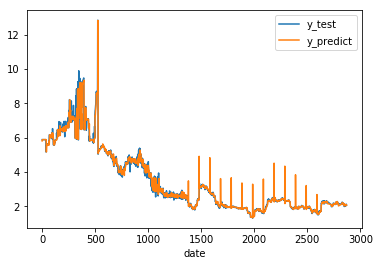

In [55]:
tdf.loc[:, ["y_test", "y_predict"]].plot()

In [57]:
# why this looks so good, are we peeking into the future?

In [62]:
total_df = pd.read_excel("../raw_df_observe.xlsx", index_col=0)

In [64]:
(total_df["y"] == total_df["Yield-lag-1"]).all()

False